<a href="https://colab.research.google.com/github/Sashka123123/CHM/blob/main/%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%BD%D0%B05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Розв'язок методом простої ітерації:
x = 1.1298767237736644, y = 0.7751754409314513
The amount of iteration = 42
Check: [ 0.00194674 -0.01196233]


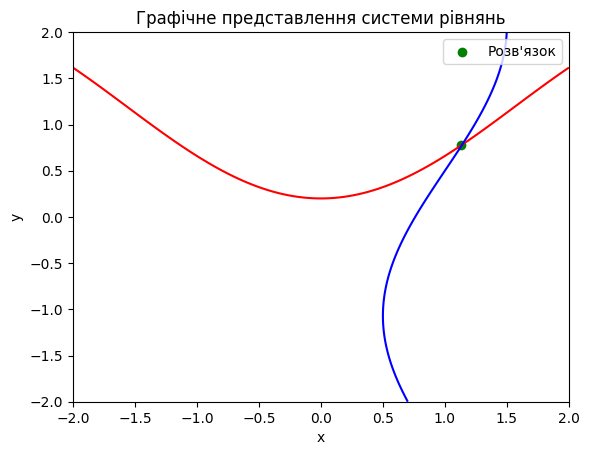

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Визначення функцій системи рівнянь
def f1(x, y):
    return np.cos(x) + y - 1.2

def f2(x, y):
    return 2 * x - np.sin(y - 0.5) - 2

# Похідні функцій для методу простої ітерації
def df1_dx(x, y):
    return -np.sin(x)

def df1_dy(x, y):
    return 1

def df2_dx(x, y):
    return 2

def df2_dy(x, y):
    return -np.cos(y - 0.5)

# Початкові наближення
x0 = 0.5
y0 = 0.5

# Крок ітерації
alpha = 0.1

# Точність
epsilon = 0.001

# Максимальна кількість ітерацій
max_iter = 100

# Метод простої ітерації
for i in range(max_iter):
    x1 = x0 - alpha * (f1(x0, y0) * df2_dy(x0, y0) - f2(x0, y0) * df1_dy(x0, y0)) / (df1_dx(x0, y0) * df2_dy(x0, y0) - df2_dx(x0, y0) * df1_dy(x0, y0))
    y1 = y0 - alpha * (f2(x0, y0) * df1_dx(x0, y0) - f1(x0, y0) * df2_dx(x0, y0)) / (df1_dx(x0, y0) * df2_dy(x0, y0) - df2_dx(x0, y0) * df1_dy(x0, y0))

    # Перевірка на точність
    if np.abs(x1 - x0) < epsilon and np.abs(y1 - y0) < epsilon:
        print("Розв'язок методом простої ітерації:")
        print(f"x = {x1}, y = {y1}")
        print(f"The amount of iteration = {i + 1}")
        check_values = np.array([f1(x1, y1), f2(x1, y1)])
        print(f"Check: {check_values}")
        break

    x0, y0 = x1, y1

# Відображення графіка
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z1 = f1(X, Y)
Z2 = f2(X, Y)

plt.contour(X, Y, Z1, levels=[0], colors='r')
plt.contour(X, Y, Z2, levels=[0], colors='b')
plt.scatter(x1, y1, color='green', label='Розв\'язок')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графічне представлення системи рівнянь')
plt.legend()
plt.show()
